<a href="https://colab.research.google.com/github/ParthGandhi-dev/Crime-Rate-Predictions/blob/main/Cr_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/Crime.csv'
crime_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
crime_data.head()

,Unemployment Rate (%),Police Funding (Million $),Education Level (Years),Population Density (people/sq km),Crime Rate (per 1000)
0,5.993428,59.261775,14.798711,1233.508323,-79.215525
1,4.723471,69.094166,13.849267,834.644285,-101.199078
2,6.295377,36.014324,12.119261,754.540335,-48.245170
3,8.046060,55.629692,10.706126,998.987663,-62.278667
4,4.531693,43.493574,13.396447,948.944613,-68.927356


In [ ]:
# Check for missing values
missing_values = crime_data.isnull().sum()

# Describe the dataset to understand basic statistics
data_description = crime_data.describe()

missing_values, data_description

(Unemployment Rate (%)                0
 Police Funding (Million $)           0
 Education Level (Years)              0
 Population Density (people/sq km)    0
 Crime Rate (per 1000)                0
 dtype: int64,
        Unemployment Rate (%)  Police Funding (Million $)  \
 count             500.000000                  500.000000   
 mean                5.013676                   50.318261   
 std                 1.962506                    9.779972   
 min                -1.482535                   23.031134   
 25%                 3.599385                   44.047083   
 50%                 5.025594                   50.285316   
 75%                 6.273567                   56.512423   
 max                12.705463                   76.323821   
 
        Education Level (Years)  Population Density (people/sq km)  \
 count               500.000000                         500.000000   
 mean                 12.216969                        1009.956383   
 std                   2

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = crime_data.drop(columns=['Crime Rate (per 1000)'])
y = crime_data['Crime Rate (per 1000)']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 4), (100, 4), (400,), (100,))

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Coefficients and Intercept of the model
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

(array([ 2.9374834 , -1.47548317, -2.10615059,  0.01833295]),
 2.0138924657354664)

Mean Squared Error: 21.031882791787375
R-squared: 0.9449434540776442


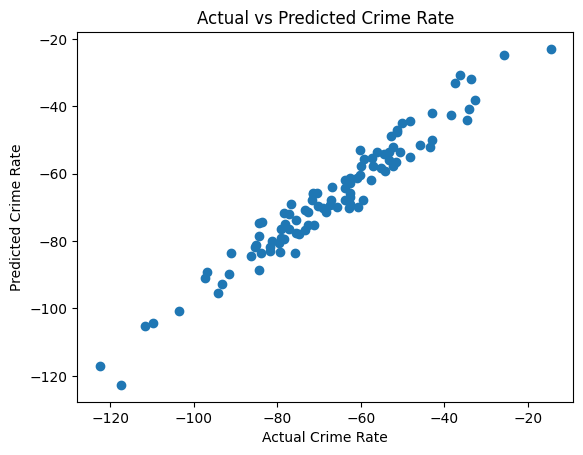

In [ ]:
# Step 7: Predicting on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluating the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 9: Visualizing the results
import matplotlib.pyplot as plt

# Plotting the actual vs predicted crime rates
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted Crime Rate')
plt.show()